In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def get_parameters(model):
  w, b = model.parameters()
  w1, w2 = w.view(2)
  w1 = w1.item()
  w2 = w2.item()
  b = b.item()
  return w1, w2, b

In [3]:
def plot_fit(model, title):
  plt.title = title
  plt.figure(figsize=(4,4))
  w1, w2, b = get_parameters(model)
  x1 = np.array([-2, 2])
  x2 = (w1*x1 + b)/(-w2) # line: w1x1 + w2x2 + b = 0
  plt.plot(x1, x2, 'k')

  plt.scatter(X[y==0, 0], X[y==0, 1], color='blue')
  plt.scatter(X[y==1, 0], X[y==1, 1], color='red');
  plt.show()

In [4]:
# Create data
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))
print(y.shape)

(100,)


In [5]:
x_data.type(), y_data.type()

('torch.FloatTensor', 'torch.FloatTensor')

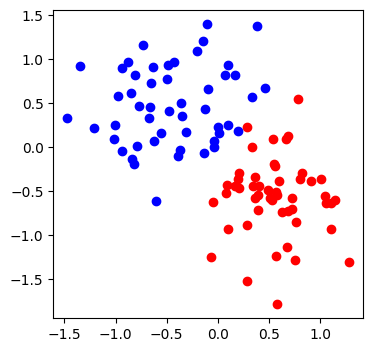

In [6]:
plt.figure(figsize=(4,4))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red');

In [7]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
      super().__init__()
      self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
      pred = torch.sigmoid(self.linear(x))
      return pred
    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

In [8]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


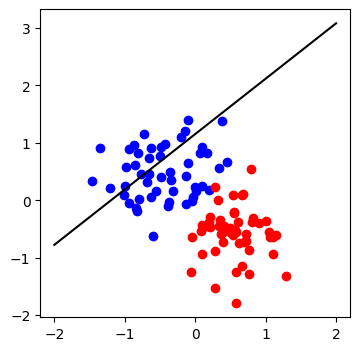

In [9]:
plot_fit(model, 'Initial Model')

In [10]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [18]:
epochs = 10000
losses = []

for epoch in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  if epoch % 1000 == 0:
    print("epoch:", epoch, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.07419227808713913
epoch: 1000 loss: 0.07180792838335037
epoch: 2000 loss: 0.06965027749538422
epoch: 3000 loss: 0.06768525391817093
epoch: 4000 loss: 0.0658852830529213
epoch: 5000 loss: 0.06422857195138931
epoch: 6000 loss: 0.06269662082195282
epoch: 7000 loss: 0.06127448007464409
epoch: 8000 loss: 0.05994953587651253
epoch: 9000 loss: 0.05871109664440155


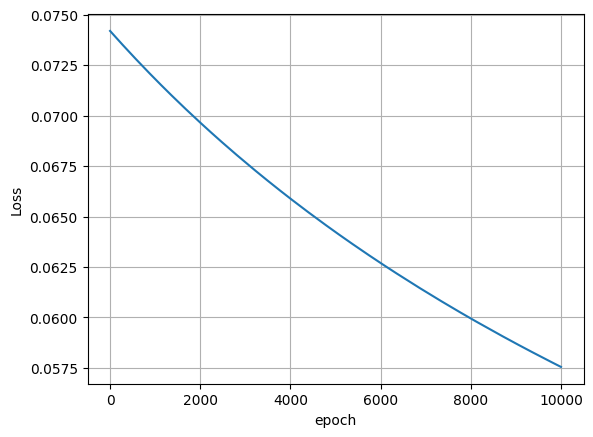

In [19]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

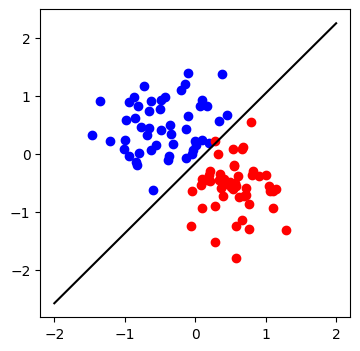

In [20]:
plot_fit(model, "Trained Model")

In [21]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])

print("Point1 positive probability = {}".format(model.forward(point1).item()))
print("Point1 belongs to class {}".format(model.predict(point1)))
print("Point2 positive probability = {}".format(model.forward(point2).item()))
print("Point2 belongs to class = {}".format(model.predict(point2)))

Point1 positive probability = 0.9999330043792725
Point1 belongs to class 1
Point2 positive probability = 1.4277605259849224e-05
Point2 belongs to class = 0
